In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
df = pd.read_csv("../Data/Combined/0.0.1-hT_withRDKitDesc.csv")
df.describe()

,Temperature,MeltingPoint/C,logHenry,BoilingPoint/C,DecompositionPoint/C,CMC,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,MolLogP,MolMR
count,15433.000000,6846.000000,7604.000000,6127.000000,9.000000,222.000000,15408.000000,15408.000000,15408.000000,15408.000000,...,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000
mean,935.049906,19.911316,-0.384544,149.468890,252.611111,0.041593,8.386118,8.385875,0.477619,-0.442145,...,7.668828,6.983273,0.938317,-0.374818,4.082329,1.976002,2.763256,0.032310,2.482285,55.443139
std,2277.000798,142.467334,8.774598,187.890557,79.372846,0.238030,3.464170,3.464045,0.689504,1.595512,...,10.460901,11.268676,2.163719,4.789022,5.987761,5.287633,3.724629,1.672388,2.359652,34.472393
min,-6973.150000,-272.200000,-23.175802,-268.900000,166.000000,-0.000796,0.000000,0.000000,0.000000,-10.472222,...,-14.322623,-10.394483,-17.818452,-165.444591,-31.380249,-81.960520,-13.229167,-36.092723,-17.406400,0.000000
25%,25.000000,-80.650000,-5.776353,82.466667,186.000000,0.002347,5.634722,5.634722,0.098349,-0.868039,...,0.000000,0.000000,0.000000,-0.190513,0.000000,0.000000,0.000000,0.000000,1.007050,31.471000
50%,25.000000,-5.000000,-1.972203,132.500000,256.000000,0.003362,9.487223,9.487223,0.265055,-0.139603,...,2.345174,2.045166,0.000000,0.000000,0.000000,0.000000,1.882039,0.000000,2.104800,48.483250
75%,25.000000,99.247500,3.218876,198.000000,275.000000,0.004074,11.006674,11.006674,0.635417,0.433602,...,11.480391,9.652511,1.288615,0.168408,7.092593,2.750000,4.324814,0.000000,3.531825,73.659050
max,28726.850000,2996.100000,91.063673,5425.000000,410.000000,2.350000,17.442653,17.442653,9.847222,7.000000,...,129.011918,264.875935,27.441557,10.604565,56.072320,104.690182,106.972354,18.755058,26.246600,696.515400


## CMC vs Temperature

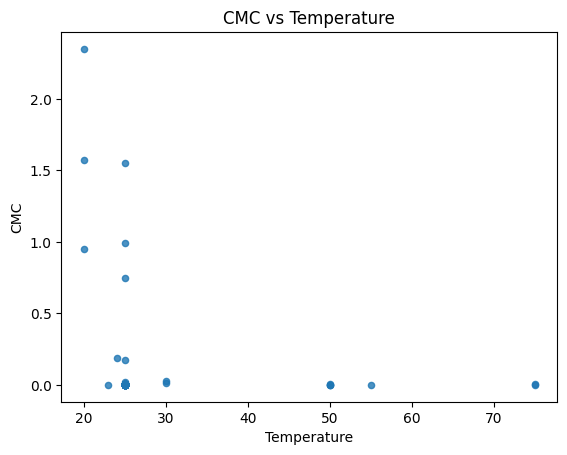

In [59]:
cmcAnalysis = df.copy()
cmcAnalysis.dropna(subset=["CMC"], inplace=True)
plt.scatter(cmcAnalysis["Temperature"], cmcAnalysis["CMC"], s=20, alpha=0.8)
plt.xlabel("Temperature"); plt.ylabel("CMC")
plt.title("CMC vs Temperature")
plt.show()

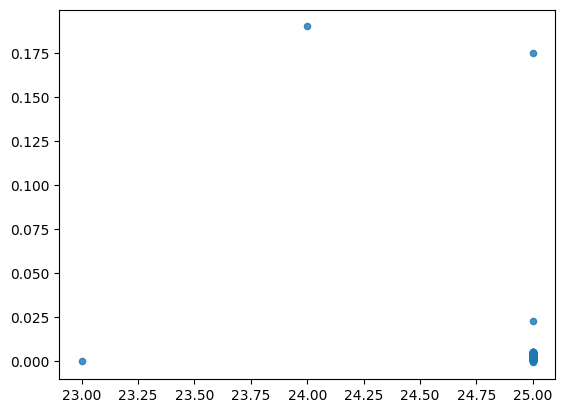

In [60]:
cmcAnalysis = cmcAnalysis[cmcAnalysis["Temperature"] < 30]
cmcAnalysis = cmcAnalysis[cmcAnalysis["CMC"] < 0.5]
plt.scatter(cmcAnalysis["Temperature"], cmcAnalysis["CMC"], s=20, alpha=0.8)

All the data is clustered at 25C due to assumption in HL extraction.

## logS vs Temperature

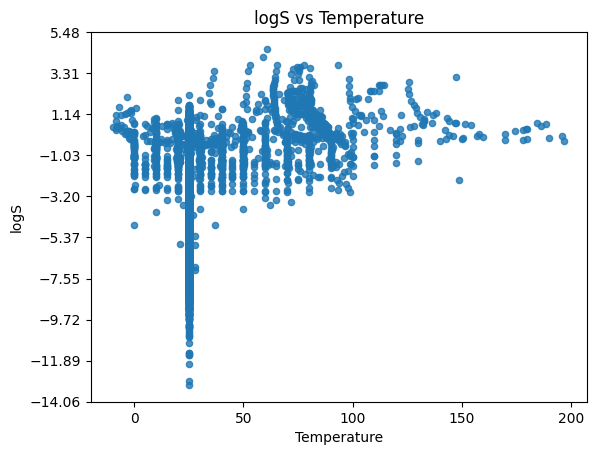

In [61]:
logS_T = df.copy()
logS_T.dropna(subset=["logS"], inplace=True)
logS_T = logS_T[logS_T["logS"] != "TolError"]
logS_T = logS_T[logS_T["Temperature"] < 200]
logS_T = logS_T[logS_T["Temperature"] > - 10]

desc = logS_T.describe()
logS_T.sort_values("logS", inplace=True)
logS = logS_T["logS"].values.astype(float)
temps = logS_T["Temperature"].values.astype(float)

fig, ax = plt.subplots()
ax.scatter(temps, logS, s=20, alpha=0.8)

s, e = ax.get_ylim()
tickList = np.linspace(s, e, 10)
tickList = np.around(tickList, 2)
ax.yaxis.set_ticks(tickList) 

plt.title("logS vs Temperature")
plt.xlabel("Temperature"); plt.ylabel("logS")
plt.show()

## logS vs Boiling Point

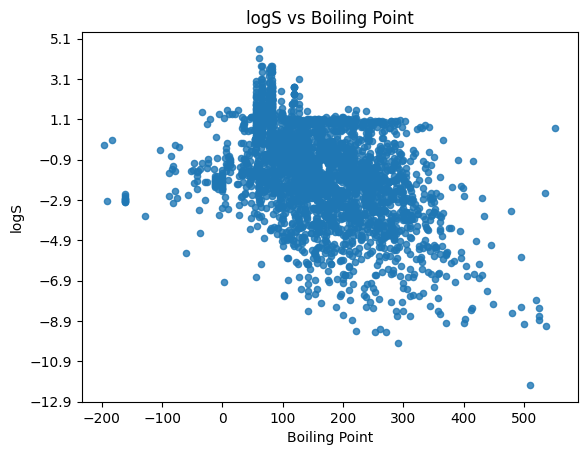

In [62]:
logS_bp = df.copy()
logS_bp.dropna(subset=["logS"], inplace=True)
logS_bp.dropna(subset=["BoilingPoint/C"], inplace=True)
logS_bp = logS_bp[logS_bp["BoilingPoint/C"] < 600]
logS_bp = logS_bp[logS_bp["logS"] != "TolError"]
logS_bp = logS_bp[logS_bp["BoilingPoint/C"] != "TolError"]

logS = logS_bp["logS"].values.astype(float)

fig, ax = plt.subplots()
ax.scatter(logS_bp["BoilingPoint/C"], logS, s=20, alpha=0.8)
s, e = ax.get_ylim()
plt.xlabel("Boiling Point"); plt.ylabel("logS")
plt.title("logS vs Boiling Point")
ax.yaxis.set_ticks(np.arange(s, e, 2))
plt.show() 

## logS vs CMC

In [63]:
logS_cmc = df.copy()
logS_cmc.dropna(subset=["logS"], inplace=True)
logS_cmc.dropna(subset=["CMC"], inplace=True)

logS_cmc

,Compound,SMILES,InChI,Temperature,MeltingPoint/C,logHenry,BoilingPoint/C,DecompositionPoint/C,logS,CMC,...,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,MolLogP,MolMR
459,"ethanol, 2-(octyloxy)-",CCCCCCCCOCCO,InChI=1S/C10H22O2/c1-2-3-4-5-6-7-9-12-10-8-11/...,25.0,NaN,NaN,NaN,NaN,-2.1250000000001936,0.003690,...,0.0,8.413923,0.0,0.0,0.0,7.764362,3.682380,0.0,2.3558,51.2808
773,"3-octyloxy-propane-1,2-diol",CCCCCCCCOCC(O)CO,InChI=1S/C11H24O3/c1-2-3-4-5-6-7-8-14-10-11(13...,25.0,NaN,NaN,NaN,NaN,-1.9208000000001828,0.003763,...,0.0,17.460171,0.0,0.0,0.0,6.741365,2.948943,0.0,1.7167,57.2876


Only two entries with CMC and LogS data

## Henry's Law vs logS

All data is at 25c.

Text(0.5, 1.0, "Henry's Law Constant vs logS")

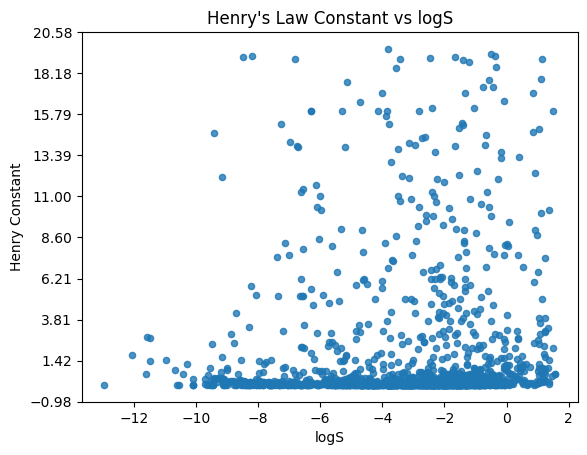

In [64]:
logS_HL = df.copy()
logS_HL.dropna(subset=["logS"], inplace=True)
logS_HL.dropna(subset=["HenryConstant"], inplace=True)
logS_HL = logS_HL[logS_HL["HenryConstant"] != "TolError"]
logS_HL = logS_HL[logS_HL["HenryConstant"].astype(float) < 20]

logS = logS_HL["logS"].values.astype(float)
hl = logS_HL["HenryConstant"].values.astype(float)

fig, ax = plt.subplots()
ax.scatter(logS, hl, s=20, alpha=0.8)
s, e = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(s, e, 10))
plt.xlabel("logS"); plt.ylabel("Henry Constant")
plt.title("Henry's Law Constant vs logS")

## Henry's Law Constant vs Mol.Wt

Text(0, 0.5, "Henry's Law Constant")

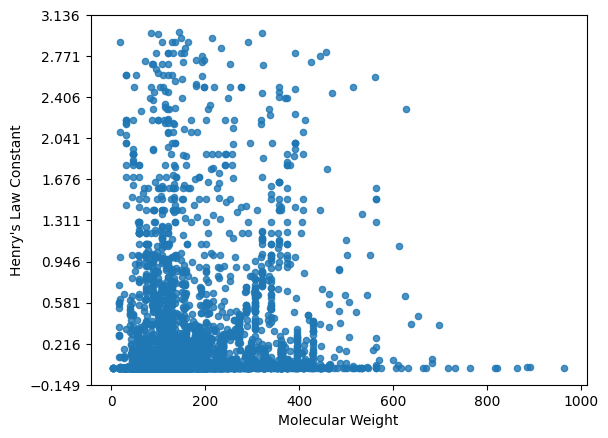

In [65]:
hl_MW = df.copy()
hl_MW.dropna(subset=["HenryConstant"], inplace=True)
hl_MW.dropna(subset=["MolWt"], inplace=True)
hl_MW = hl_MW[hl_MW["MolWt"] < 1000]
hl_MW = hl_MW[hl_MW["HenryConstant"] != "TolError"]
hl_MW = hl_MW[hl_MW["HenryConstant"].astype(float) < 3]

hl = hl_MW["HenryConstant"].values.astype(float)

fig, ax = plt.subplots()
ax.scatter(hl_MW["MolWt"], hl, s=20, alpha=0.8)
s, e = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(s, e, 10))
plt.xlabel("Molecular Weight"); plt.ylabel("Henry's Law Constant")

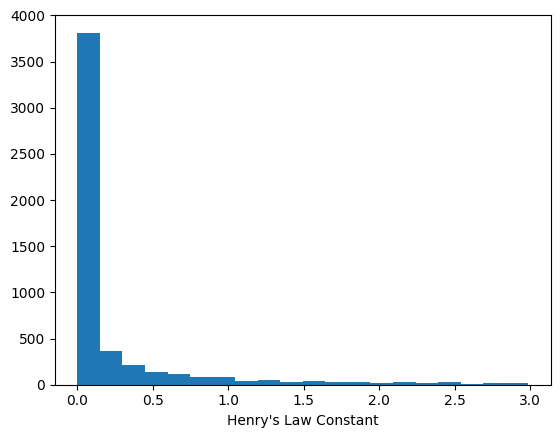

In [66]:
plt.hist(hl, bins=20)
plt.xlabel("Henry's Law Constant")
plt.show()

Text(0.5, 0, "log(Henry's Law Constant)")

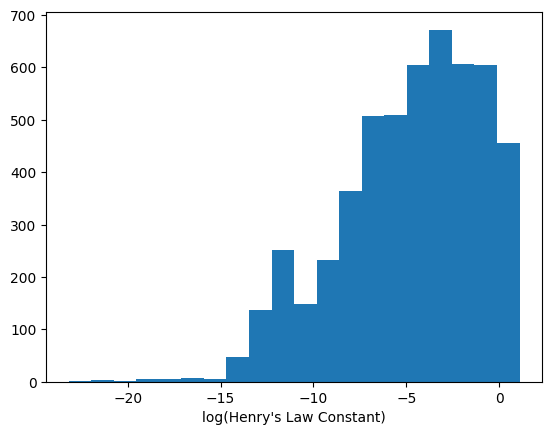

In [67]:
logHL = np.log(hl)
plt.hist(logHL, bins=20)
plt.xlabel("log(Henry's Law Constant)")

Text(0, 0.5, "log(Henry's Law Constant)")

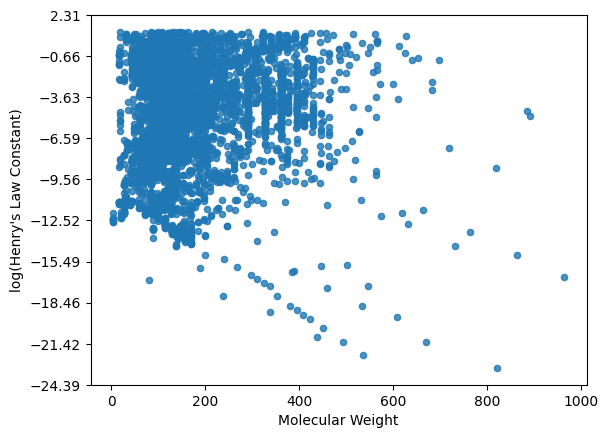

In [68]:
fig, ax = plt.subplots()
ax.scatter(hl_MW["MolWt"], logHL, s=20, alpha=0.8)
s, e = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(s, e, 10))
plt.xlabel("Molecular Weight"); plt.ylabel("log(Henry's Law Constant)")

Text(0.5, 1.0, "Henry's Law Constant vs logS")

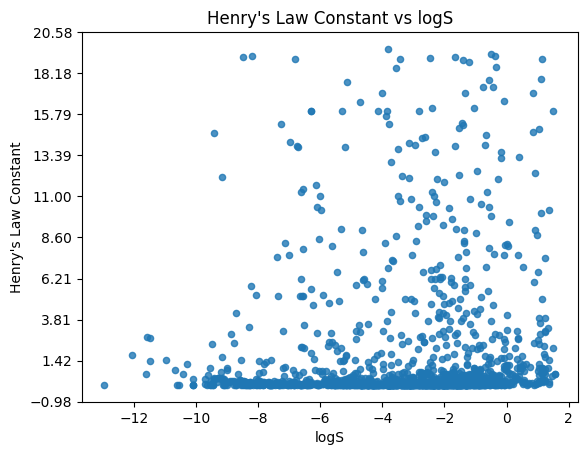

In [69]:
logH_logS = df.copy()
logH_logS.dropna(subset=["HenryConstant"], inplace=True)
logH_logS.dropna(subset=["logS"], inplace=True)
logH_logS = logH_logS[logH_logS["HenryConstant"] != "TolError"]
logH_logS = logH_logS[logH_logS["HenryConstant"].astype(float) < 20]

logH = logH_logS["HenryConstant"].values.astype(float)
logS = logH_logS["logS"].values.astype(float)

fig, ax = plt.subplots()
ax.scatter(logS, logH, s=20, alpha=0.8)
s, e = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(s, e, 10))
plt.xlabel("logS"); plt.ylabel("Henry's Law Constant")
plt.title("Henry's Law Constant vs logS")

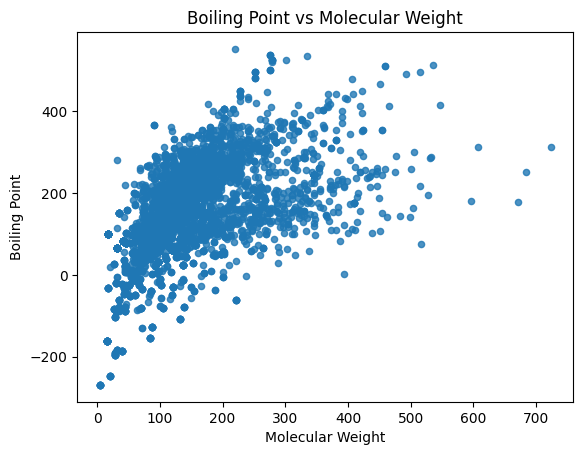

In [70]:
bp_MW = df.copy()
bp_MW.dropna(subset=["BoilingPoint/C"], inplace=True)
bp_MW = bp_MW[bp_MW["BoilingPoint/C"] < 600]
bp_MW.dropna(subset=["MolWt"], inplace=True)

plt.scatter(bp_MW["MolWt"], bp_MW["BoilingPoint/C"], s=20, alpha=0.8)
plt.xlabel("Molecular Weight"); plt.ylabel("Boiling Point")
plt.title("Boiling Point vs Molecular Weight")
plt.show()

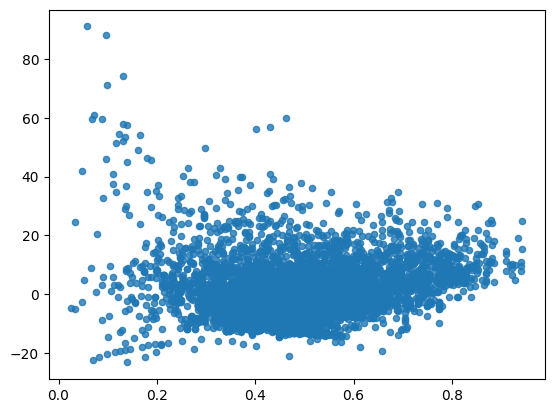

In [71]:
qed_logH = df.copy()
qed_logH.dropna(subset=["qed"], inplace=True)
qed_logH.dropna(subset=["logHenry"], inplace=True)

qed = qed_logH["qed"].values.astype(float)
hl = qed_logH["logHenry"].values.astype(float)

fig, ax = plt.subplots()
ax.scatter(qed, hl, s=20, alpha=0.8)